In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import utils.postprocess as postpro

In [2]:
def open(img, kernel_size=3, iter=1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * kernel_size + 1, 2 * kernel_size + 1),
                                       (kernel_size, kernel_size))
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=iter)
    return img

def close(img, kernel_size=3, iter=1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * kernel_size + 1, 2 * kernel_size + 1),
                                       (kernel_size, kernel_size))
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=iter)
    return img

def erode(img, kernel_size=3, iter=1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * kernel_size + 1, 2 * kernel_size + 1),
                                       (kernel_size, kernel_size))
    img = cv2.erode(img, kernel, iterations=iter)
    return img


def dilate(img, kernel_size=3, iter=1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * kernel_size + 1, 2 * kernel_size + 1),
                                       (kernel_size, kernel_size))
    img = cv2.dilate(img, kernel, iterations=iter)
    return img


def find_and_fill_contour(img):
    contours, hierar = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return cv2.drawContours(img, contours, -1, 255, thickness=cv2.FILLED)

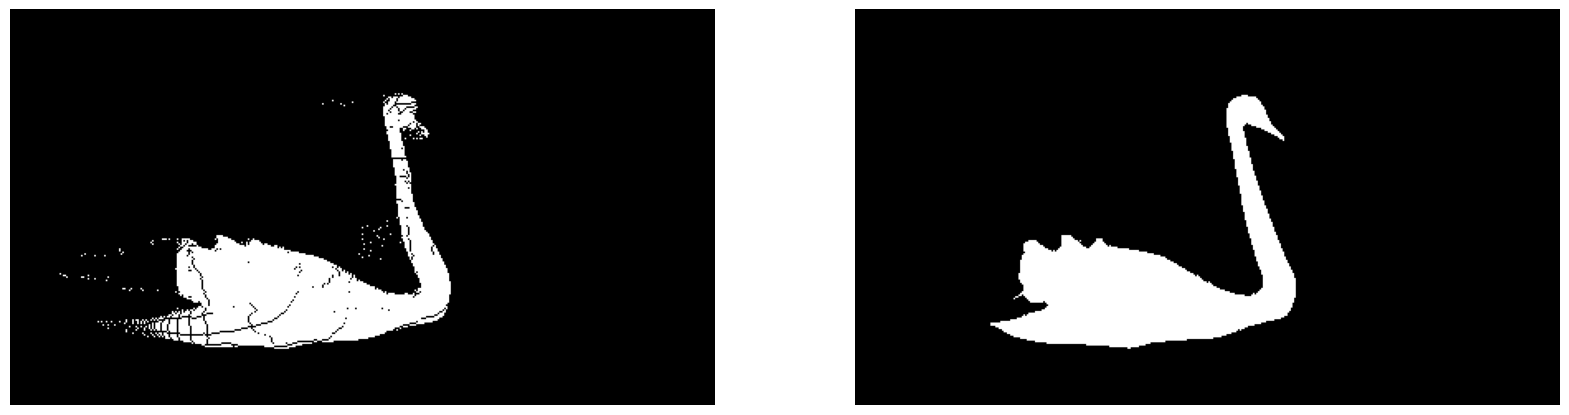

In [3]:
img = cv2.imread("data/mask-outputs/seq-raft_swan/020.png", cv2.IMREAD_GRAYSCALE)
img_truth = cv2.imread("data/sequences-train/swan-020.png")
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.axis('off')
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.axis('off')
plt.imshow(img_truth, cmap='gray')

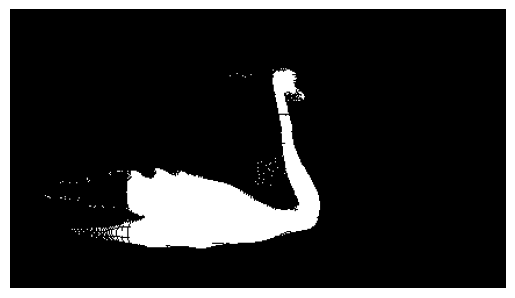

In [4]:
contour_img = find_and_fill_contour(img)
plt.axis('off')
plt.imshow(contour_img, cmap="gray")

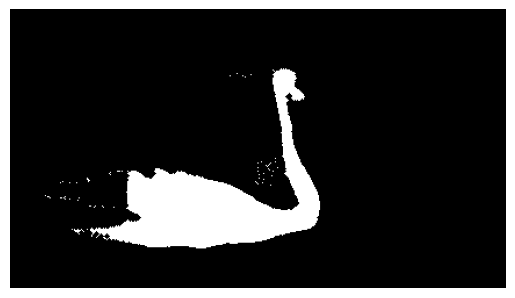

In [5]:
img_closed = close(contour_img, kernel_size=1, iter=2)
plt.axis('off')
plt.imshow(img_closed, cmap="gray")

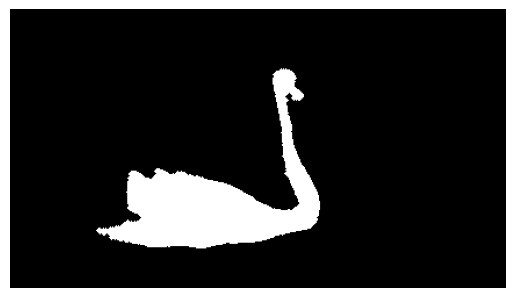

In [6]:
img_opened = open(img_closed, kernel_size=1, iter=2)
plt.axis('off')
plt.imshow(img_opened, cmap="gray")

In [10]:
methods = ["direct-raft"]

In [11]:
for method in methods:
    postpro.process_all_masks(sequence_name="swan", method_name=method, masks_path="data/mask-outputs/")

100%|██████████| 49/49 [00:00<00:00, 107.37it/s]
